In [38]:
# Mathematical/data cleaning tools
import numpy as np
import pandas as pd
from collections import Counter

#sklearn
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import csr_matrix

#gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import gensim.corpora as corpora
from gensim.models import CoherenceModel

#nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
# nltk.download('wordnet')

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

## Twitter Data

In [57]:
twitter = pd.read_csv('data/full-corpus.csv')
# twitter2 = pd.read_csv('data/twitter_en.txt', sep='\n')

In [58]:
twitter.head()

,Topic,Sentiment,TweetId,TweetDate,TweetText
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...


In [59]:
twitter.Topic.unique()

array(['apple', 'google', 'microsoft', 'twitter'], dtype=object)

In [60]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text, min_len=0):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > min_len:
            result.append(lemmatize_stemming(token))
    return result

In [61]:
stemmer = SnowballStemmer('english')
processed_docs = twitter['TweetText'].map(preprocess)

In [62]:
type(processed_docs)

pandas.core.series.Series

In [63]:
processed_docs.head()

0                   [appl, swype, iphon, crack, iphon]
1        [appl, add, carrier, support, iphon, announc]
2    [hilari, youtub, video, guy, duet, appl, siri,...
3                 [rim, easi, switch, appl, iphon, ya]
4      [realiz, reason, get, twitter, io, thank, appl]
Name: TweetText, dtype: object

In [64]:
doc_array = processed_docs.values

In [99]:
doc_array = doc_array.reshape((-1,1))
doc_array[0]

array([list(['appl', 'swype', 'iphon', 'crack', 'iphon'])], dtype=object)

In [102]:
def wc_whole_corpus(doc_array):
#     doc_array = np.array(doc_array).flatten()
    y = np.array([np.array(xi[0][0]).flatten() for xi in doc_array]).flatten()
    unique, counts = np.unique(y, return_counts=True)
    return dict(zip(unique, counts))

In [104]:
word_count = wc_whole_corpus(doc_array)
word_count

{'aa': 2,
 'aai': 1,
 'abl': 1,
 'abonnez': 1,
 'abrazo': 1,
 'absolut': 2,
 'acabo': 4,
 'acaso': 1,
 'accord': 3,
 'acris_rey': 1,
 'acuerdo': 2,
 'adaddi': 1,
 'adasia': 1,
 'add': 4,
 'addict': 1,
 'adictotr': 1,
 'adiman_': 1,
 'adityasood': 1,
 'admit': 1,
 'adomani': 1,
 'adopt': 1,
 'adrianosabino': 1,
 'adult': 1,
 'advertis': 1,
 'affan': 1,
 'affichag': 1,
 'agora': 1,
 'agre': 2,
 'ah': 2,
 'ahaaa': 1,
 'ahahaa': 1,
 'ahh': 1,
 'ahhahahaha': 1,
 'ahhh': 1,
 'ahhhh': 2,
 'ahora': 3,
 'ai': 1,
 'ain': 1,
 'aint': 1,
 'akirareiko': 1,
 'akita': 1,
 'aktion': 1,
 'ala': 1,
 'alanlepo': 1,
 'albertm': 1,
 'alecp': 1,
 'aleeretana': 1,
 'aleexlima': 1,
 'alegarcia': 1,
 'alejado': 1,
 'alexbabb': 1,
 'alexlindsay': 1,
 'alexmufferi': 1,
 'alg': 2,
 'algodón': 1,
 'algorithm': 1,
 'alguien': 3,
 'alguno': 1,
 'allie_hook': 1,
 'allyfish': 1,
 'alright': 2,
 'alrit': 1,
 'aluno': 1,
 'alx': 1,
 'amaboura': 1,
 'amandbrar': 1,
 'amaz': 3,
 'american': 1,
 'ammazza': 1,
 'ammmylewi':

In [105]:
wc_df = pd.DataFrame.from_dict(word_count, orient='index')
wc_df.head()

,0
aa,2
aai,1
abl,1
abonnez,1
abrazo,1


In [107]:
wc_df = wc_df.sort_values(by=0, ascending=False)
wc_df

,0
rt,602
microsoft,328
googl,260
appl,226
twitter,207
android,99
new,54
samsung,45
http,33
iphon,32


In [108]:
wc_20 = wc_df[:20]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

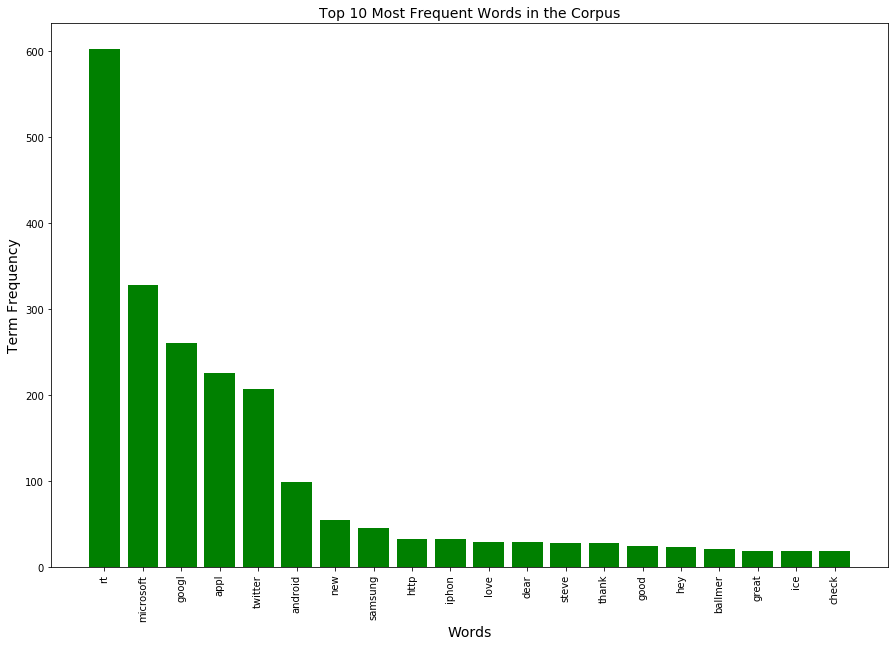

In [110]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(wc_20.index, wc_20[0], color='g')
plt.title("Top 10 Most Frequent Words in the Corpus", fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Term Frequency', fontsize=14)
plt.savefig('media/tf.png')
plt.xticks(rotation=90)

In [111]:
#create dictionary
id2word = gensim.corpora.Dictionary(processed_docs)

#create corpus
texts = processed_docs

#Term Document Frequency
bow_corpus = [id2word.doc2bow(text) for text in texts]

In [112]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in bow_corpus]

[[('appl', 1), ('crack', 1), ('iphon', 2), ('swype', 1)],
 [('appl', 1),
  ('iphon', 1),
  ('add', 1),
  ('announc', 1),
  ('carrier', 1),
  ('support', 1)],
 [('appl', 1),
  ('affair', 1),
  ('duet', 1),
  ('exbnqji', 1),
  ('guy', 1),
  ('hilari', 1),
  ('http', 1),
  ('love', 1),
  ('pretti', 1),
  ('siri', 1),
  ('sum', 1),
  ('video', 1),
  ('youtub', 1)],
 [('appl', 1),
  ('iphon', 1),
  ('easi', 1),
  ('rim', 1),
  ('switch', 1),
  ('ya', 1)],
 [('appl', 1),
  ('get', 1),
  ('io', 1),
  ('realiz', 1),
  ('reason', 1),
  ('thank', 1),
  ('twitter', 1)],
 [('appl', 1),
  ('iphon', 1),
  ('android', 1),
  ('bite', 1),
  ('blackberri', 1),
  ('current', 1),
  ('disappoint', 1),
  ('littl', 1),
  ('user', 1)],
 [('appl', 1),
  ('http', 1),
  ('siri', 2),
  ('far', 1),
  ('give', 1),
  ('glad', 1),
  ('happyplac', 1),
  ('humor', 1),
  ('say', 1),
  ('sens', 1),
  ('sooo', 1),
  ('strangest', 1),
  ('thing', 1),
  ('twaeudbp', 1)],
 [('appl', 1),
  ('close', 1),
  ('event', 1),
  ('gr

In [113]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=id2word, passes=5, workers=2)

In [114]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(0,
  '0.070*"twitter" + 0.025*"http" + 0.019*"appl" + 0.014*"rt" + 0.007*"follow" '
  '+ 0.007*"en" + 0.006*"que" + 0.006*"iphon" + 0.005*"microsoft" + '
  '0.005*"googl"'),
 (1,
  '0.036*"http" + 0.034*"microsoft" + 0.030*"twitter" + 0.013*"rt" + '
  '0.010*"googl" + 0.008*"android" + 0.007*"appl" + 0.006*"window" + '
  '0.006*"que" + 0.004*"el"'),
 (2,
  '0.034*"twitter" + 0.030*"http" + 0.027*"googl" + 0.020*"microsoft" + '
  '0.017*"appl" + 0.014*"rt" + 0.011*"android" + 0.006*"new" + 0.005*"phone" + '
  '0.005*"facebook"'),
 (3,
  '0.052*"twitter" + 0.016*"en" + 0.016*"googl" + 0.015*"que" + 0.014*"el" + '
  '0.012*"http" + 0.010*"android" + 0.010*"la" + 0.008*"es" + 0.007*"rt"')]


In [14]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.266558393865026

Coherence Score:  0.2845474989171778


In [16]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, id2word, mds='mmds')
pyLDAvis.save_html(vis, 'media/LDA_4_topics.html')

/home/jarid/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


## KMeans Clustering

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [142]:
documents = twitter['TweetText'].values
documents = list(documents)
documents

['Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is',
 '@Apple will be adding more carrier support to the iPhone 4S (just announced)',
 "Hilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY",
 '@RIM you made it too easy for me to switch to @Apple iPhone. See ya!',
 'I just realized that the reason I got into twitter was ios5 thanks @apple',
 "I'm a current @Blackberry user, little bit disappointed with it! Should I move to @Android or @Apple @iphone",
 'The 16 strangest things Siri has said so far. I am SOOO glad that @Apple gave Siri a sense of humor! http://t.co/TWAeUDBp via @HappyPlace',
 'Great up close & personal event @Apple tonight in Regent St store!',
 'From which companies do you experience the best customer service aside from @zappos and @apple?',
 'Just apply for a job at @Apple, hope they call me lol',
 'RT @JamaicanIdler: Lmao I think @apple is onto something magica

In [143]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
X = X.toarray()

In [144]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [145]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 twitter
 rt
 facebook
 que
 en
 el
 http
 la
 es
 goodnight
Cluster 1:
 android
 google
 nexus
 sandwich
 cream
 ice
 samsung
 galaxy
 http
 ics
Cluster 2:
 apple
 iphone
 siri
 http
 ios5
 store
 4s
 new
 ios
 iphone4s
Cluster 3:
 microsoft
 http
 google
 rt
 windows
 android
 ballmer
 yahoo
 en
 nexusprime


In [146]:
Y = vectorizer.transform(["chrome is my go to browser."])
prediction = model.predict(Y)
print(prediction)

[3]


In [147]:
Y = vectorizer.transform(["I love my iphone."])
prediction = model.predict(Y)
print(prediction)

[2]


In [150]:
Y = vectorizer.transform(["I prefer to use android"])
prediction = model.predict(Y)
print(prediction)

[3]


In [149]:
Y = vectorizer.transform(["I think Google is the best"])
prediction = model.predict(Y)
print(prediction)

[3]
